In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
file_path = "data/communities.data"
data = pd.read_csv(file_path, header=None, na_values=['?'])

In [4]:
data.head(5)

columns = ["state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"]

In [5]:
data.columns = columns

In [6]:
data.head(5)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


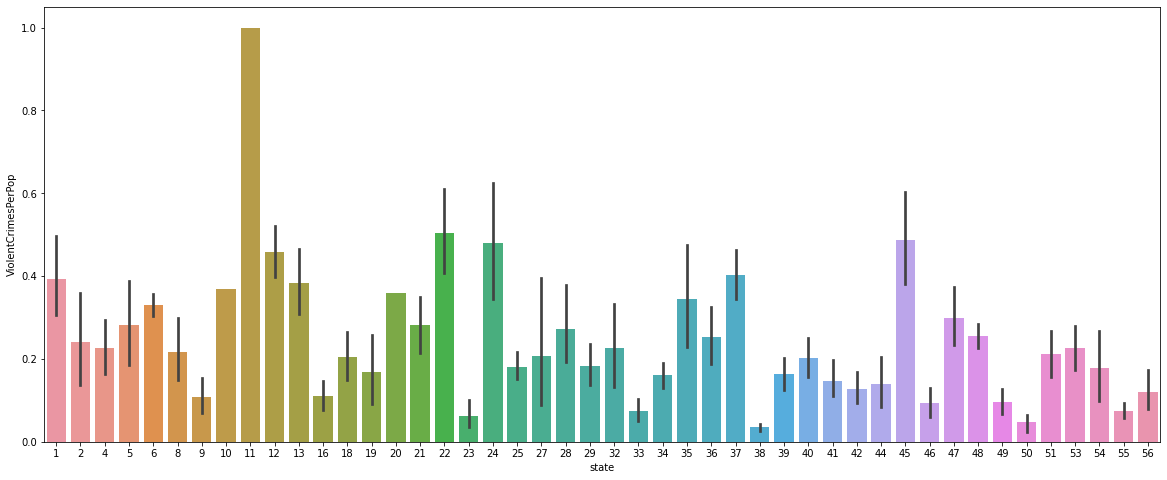

In [7]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="state", y="ViolentCrimesPerPop", data=data)
plt.show()

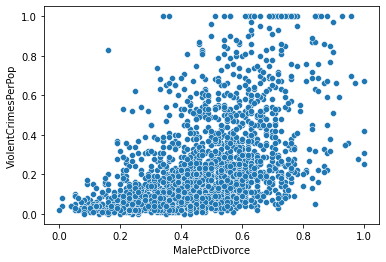

In [8]:
ax = sns.scatterplot(x="MalePctDivorce", y = "ViolentCrimesPerPop", data=data)
plt.show()

## EDA and data cleaning


In [39]:
df = data.drop(columns=['state','county','community','communityname', 'fold'])

In [40]:
len(df)

1994

In [41]:
# Cehck that we don't have any NaN entries in the data
df.isna().sum()

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 123, dtype: int64

In [42]:
missing_counts = zip(df.columns.values.tolist(), df.isnull().sum(axis=0).tolist())
missing_list = sorted(missing_counts, key=lambda x: x[1], reverse=True)
missing_list

[('LemasSwornFT', 1675),
 ('LemasSwFTPerPop', 1675),
 ('LemasSwFTFieldOps', 1675),
 ('LemasSwFTFieldPerPop', 1675),
 ('LemasTotalReq', 1675),
 ('LemasTotReqPerPop', 1675),
 ('PolicReqPerOffic', 1675),
 ('PolicPerPop', 1675),
 ('RacialMatchCommPol', 1675),
 ('PctPolicWhite', 1675),
 ('PctPolicBlack', 1675),
 ('PctPolicHisp', 1675),
 ('PctPolicAsian', 1675),
 ('PctPolicMinor', 1675),
 ('OfficAssgnDrugUnits', 1675),
 ('NumKindsDrugsSeiz', 1675),
 ('PolicAveOTWorked', 1675),
 ('PolicCars', 1675),
 ('PolicOperBudg', 1675),
 ('LemasPctPolicOnPatr', 1675),
 ('LemasGangUnitDeploy', 1675),
 ('PolicBudgPerPop', 1675),
 ('OtherPerCap', 1),
 ('population', 0),
 ('householdsize', 0),
 ('racepctblack', 0),
 ('racePctWhite', 0),
 ('racePctAsian', 0),
 ('racePctHisp', 0),
 ('agePct12t21', 0),
 ('agePct12t29', 0),
 ('agePct16t24', 0),
 ('agePct65up', 0),
 ('numbUrban', 0),
 ('pctUrban', 0),
 ('medIncome', 0),
 ('pctWWage', 0),
 ('pctWFarmSelf', 0),
 ('pctWInvInc', 0),
 ('pctWSocSec', 0),
 ('pctWPubAsst

In [43]:
columns_to_delete = [name for name, count in missing_list if count == 1675]
columns_to_delete

['LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [44]:
# Delete columns with high % of missed data
df = df.drop(columns=columns_to_delete)

# delete one sample with missed data
df = df.dropna()

In [45]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.057612,0.463437,0.179227,0.753984,0.153753,0.144089,0.424210,0.493914,0.336297,0.423086,...,0.215655,0.608776,0.534967,0.626322,0.651470,0.065243,0.232910,0.161741,0.094099,0.237983
std,0.126935,0.163747,0.252870,0.243807,0.208905,0.232531,0.155234,0.143584,0.166540,0.179196,...,0.231146,0.204314,0.181360,0.200520,0.198253,0.109485,0.203127,0.229099,0.240379,0.233043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.280000,0.770000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/tmp/ipykernel_44278/1685658689.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

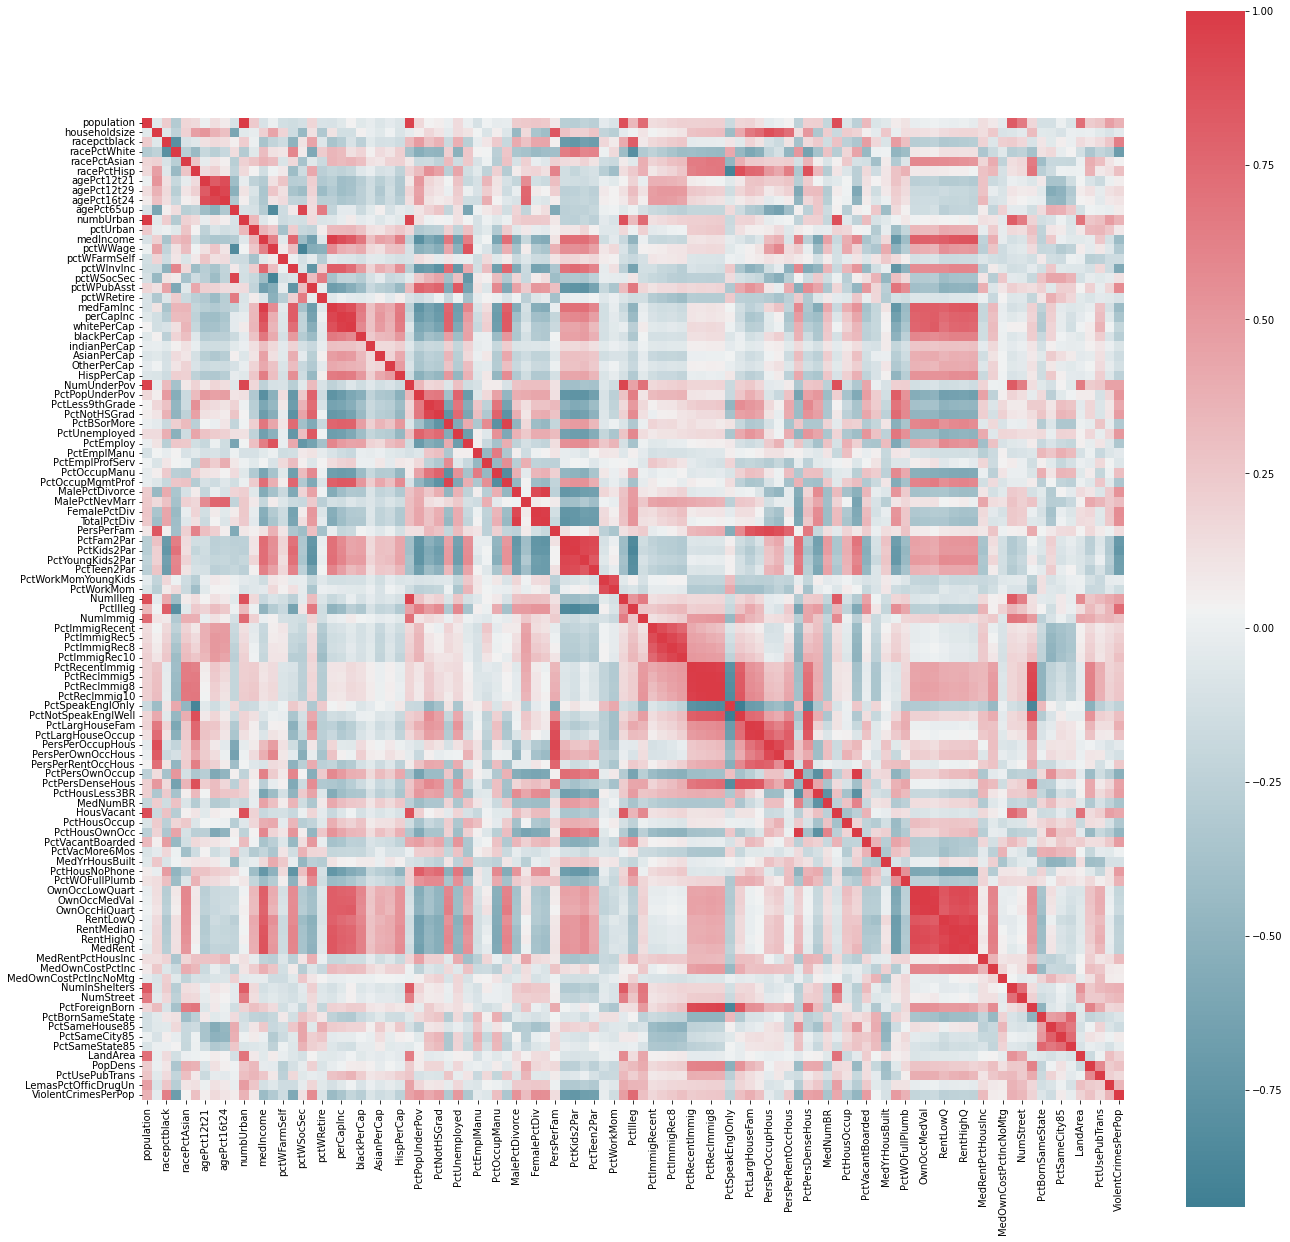

In [46]:
# Check correlated features

corr = df.corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [47]:
df = df.drop(columns=[
    "RentLowQ", 
    "RentHighQ", 
    "MedRent", 
    "MedRentPctHousInc", 
    "MedOwnCostPctInc", 
    "MedOwnCostPctIncNoMtg", 
    "PctImmigRec10", 
    "PctImmigRec8",
    "PctImmigRec5",
    "PctRecImmig10",
    "PctRecImmig8",
    "PctRecImmig5",
    "OwnOccLowQuart",
    "OwnOccMedVal",
    "OwnOccHiQuart",
    "PctKids2Par",
    "PctYoungKids2Par",
    "PctTeen2Par"])

/tmp/ipykernel_44278/2193669934.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

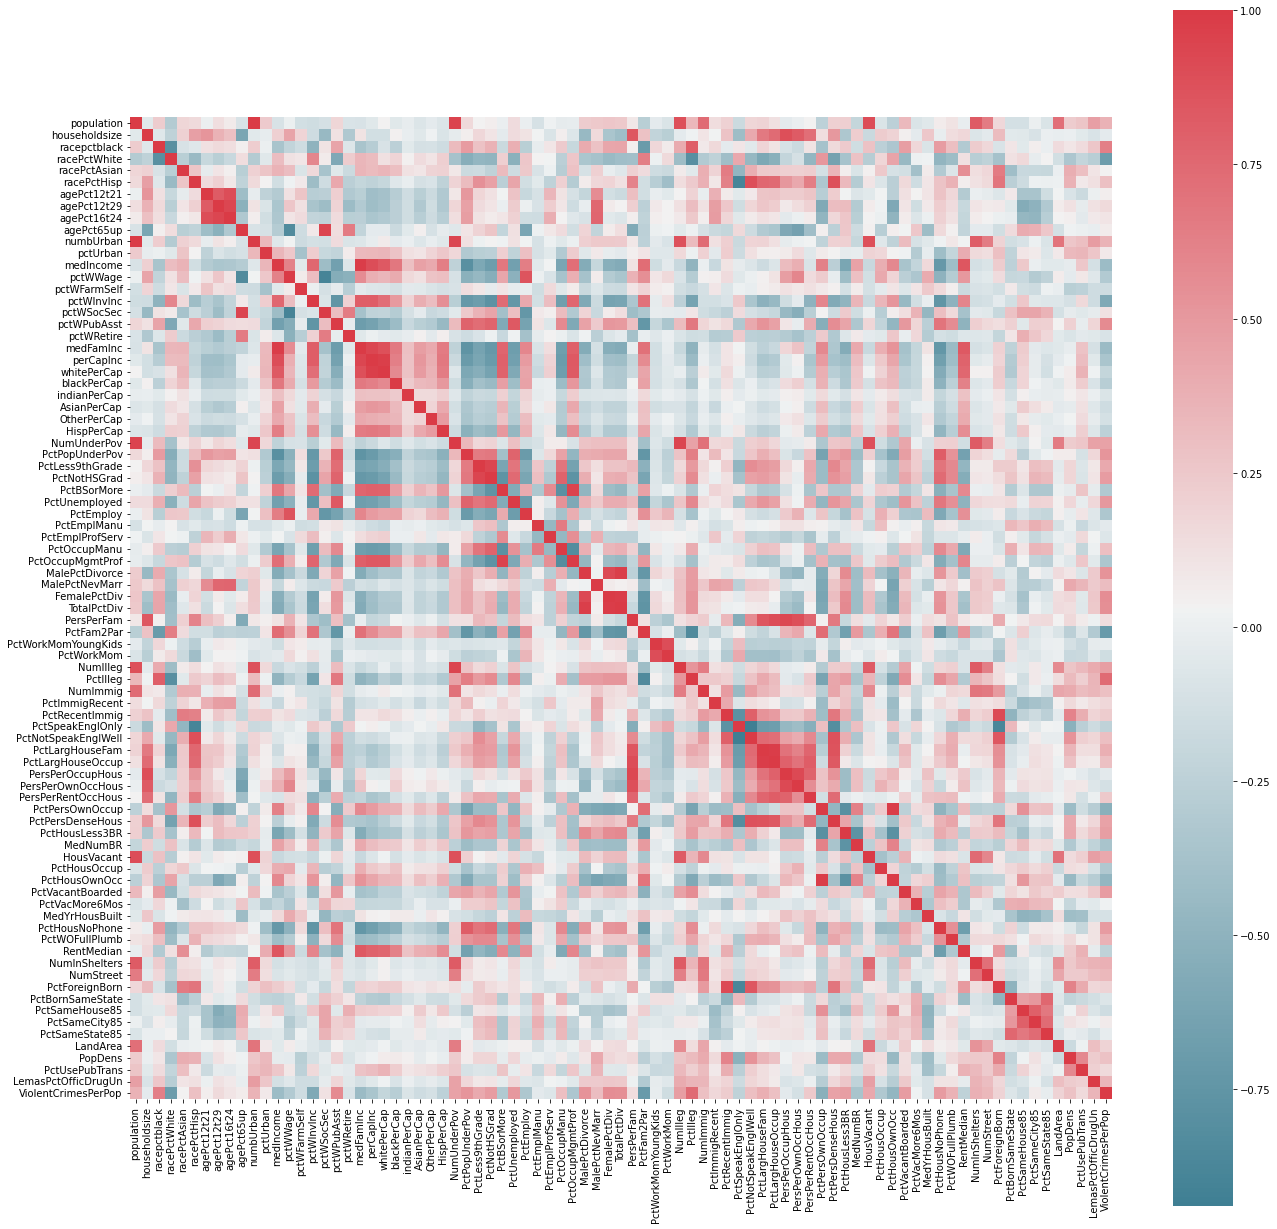

In [48]:
corr = df.corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [49]:
train_data, testval_data = train_test_split(df, test_size=0.2)
test_data, val_data = train_test_split(testval_data, test_size=0.5)

In [50]:
print(f"Train: {len(train_data)}, Val: {len(test_data)}, Test: {len(val_data)}") 

Train: 1594, Val: 199, Test: 200


# 2-3. Linear Regression model 

In [51]:
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_val, y_val = val_data.iloc[:, :-1], val_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [52]:
print(X_train.shape, y_train.shape)

(1594, 82) (1594,)


In [53]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val,y_pred)

print("Mean squared error on val set :", mse)

Mean squared error on val set : 0.017553490409275965


In [55]:
r2_metric = r2_score(y_val,y_pred)

print("r2_score on val set :", r2_metric)

r2_score on val set : 0.7006865208295087


# 4. Polynomial Features

In [56]:
ridge_regression = RidgeCV
lambdas = 10**np.linspace(10,-2,100)*0.5

# Using RidgeCV for 5-Fold Cross validation
ridge_model = ridge_regression(alphas=lambdas, fit_intercept=True, normalize=False, cv = 5)
ridge_model.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=5)

In [57]:
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Lambda value with least cv error ",ridge_model.alpha_)
print("Test set error for the chosen lambda value ",mse)

r2_metric = r2_score(y_test,y_pred)

print("r2_score on test set :", r2_metric)

Lambda value with least cv error  1.004616501282523
Test set error for the chosen lambda value  0.018046042835716918
r2_score on test set : 0.6411971501388959


In [58]:
def model_plot(
    train_score, val_scores, points, chosen_point, x_name, y_name, title):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = val_scores, x = points, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = points, 
                 label = 'training_data')
    plt.axvline(x=chosen_point, linestyle='--')

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.legend()
    plt.show()

In [59]:
linear_regression = LinearRegression()

def polymodel_search(degrees, X_train, y_train, X_val, y_val, draw_plot = True):
    
    train_scores = []
    val_scores = []
    
    for degree in degrees:
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        
        pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
        )
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_train)
        train_scores.append(r2_score(y_pred, y_train))
        
        y_pred = pipeline.predict(X_val)
        val_scores.append(r2_score(y_pred, y_val))
    
    chosen_id = np.argmax(val_scores)
    chosen_degree = degrees[chosen_id]
    max_validation_score = np.max(val_scores)
    
    val_score_at_chosen_alpha = val_scores[chosen_id]

    if draw_plot:
        model_plot(train_scores, val_scores, degrees, chosen_degree, "Degree", "R^2 score", "R2 score vs Degree")
    

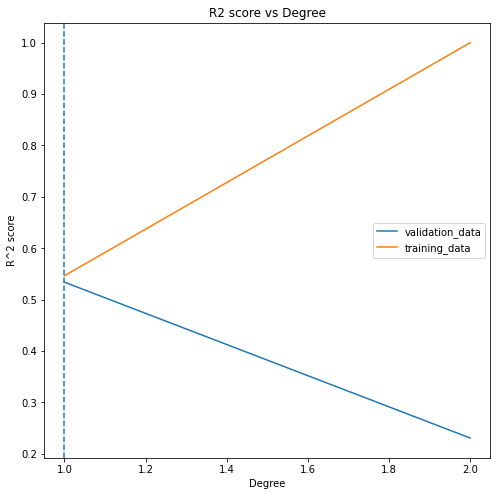

In [90]:
degrees = [1, 2]

polymodel_search(degrees, X_train, y_train, X_val, y_val)

# 5. Regularization

In [88]:
reg_model_cls = Ridge
metric = mean_squared_error

def regmodel_param_search(alphas, X, y, X_val, y_val, draw_plot = True):
    
    train_scores = []
    val_scores = []
    
    for curr_alpha in alphas:
        reg_model = reg_model_cls(alpha = curr_alpha)
        
        reg_model.fit(X,y)
        
        y_pred_train = reg_model.predict(X_train)
        y_pred_val = reg_model.predict(X_val)
        
        metric_train = metric(y_pred_train, y_train)
        metric_val = metric(y_pred_val, y_val)
        
        train_scores.append(metric_train)
        val_scores.append(metric_val)

# Note: R^2 does not become better for higher regularization strength
#         if 0 <= metric_val <= 1.0 and 0 <= metric_train <= 1.0:
#             train_scores.append(metric_train)
#             val_scores.append(metric_val)
#         else:
#             # in case model does not converge, save last score
#             train_scores.append(train_scores[-1])
#             val_scores.append(val_scores[-1])
    
    chosen_alpha_id = np.argmax(val_scores)
    chosen_alpha = alphas[chosen_alpha_id]
    max_validation_score = np.max(val_scores)
    

    val_score_at_chosen_alpha = val_scores[chosen_alpha_id]

    if draw_plot:
        model_plot(train_scores, val_scores, alphas, chosen_alpha, "Reg alpha", "R^2 score", "Ridge reg model")
    

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


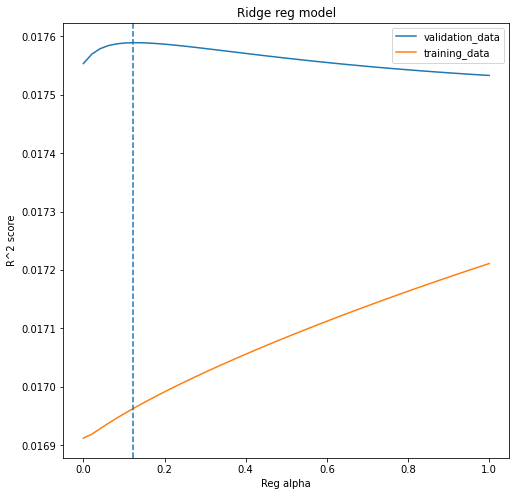

In [89]:
alphas = np.linspace(0,1,50)
print(alphas)
regmodel_param_search(alphas, X_train, y_train, X_val, y_val)